# **Ensemble Techniques - Bagging and Random Forest Lab**



**Objective:** 

The objective is to build a model that predicts if someone seeking a loan might be a defaulter or a non defaulter; making the target variable "default". Furthermore we want to determine which features are the most important in the model building process and which model is the best performing model that minimizes risk of financial losss. 

# **Data Description:**

* checking_balance

* months_loan_duration

* credit_history

* purpose

* amount

* savings_balance

* employment_duration

* percent_of_income

* years_at_residence

* age

* other_credit

* housing

* existing_loans_count

* job

* dependents

* phone

* default


In [1]:
!pip install skimpy

# **Importing libraries**

In [2]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import re
from skimpy import clean_columns

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

import multiprocessing
no_cpus = multiprocessing.cpu_count()

In [3]:
multiprocessing.cpu_count()

8

# **Loading Data**

In [4]:
# Loading the data
data = pd.read_csv('credit (1).csv')

# **Exploring the Data (EDA)**

In [5]:
# Viewing first 5 rows of the dataset
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [6]:
# Viewing last 5 rows of the dataset
data.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no


In [7]:
#Getting the shape of the dataset
data.shape

(1000, 17)

Observationn: The dataset has 17 columns and 1000 rows.

In [8]:
#Printing the columns 
print(data.columns)

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')


In [9]:
#Printing the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

Observation: 

We see that checking_balance, credit_history, purpose, savings_balance, employment_duration, other_credit, housing, job, phone and default(target variable) are all objects which will need to be converted into categorical types. The other 7 variables are int64. 

In [10]:
#Checking the dataset for missing values
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

Observation: There are no missing values in the dataset.

# **Fixing the data types**

In [11]:
#Selecting columns all columns of datatype object
cols = data.select_dtypes(['object'])
cols.columns

Index(['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_duration', 'other_credit', 'housing', 'job', 'phone',
       'default'],
      dtype='object')

In [12]:
#Converting object type into categorical variables
for i in cols.columns:
    data[i] = data[i].astype('category')

In [13]:
#Printing new data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

# **Summary of numerical features**

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


Observation: 
* The average loan duration is 20 months. 
* The average amount of the loan requested is $3,271.26
* The average percent of income is 3; this is the installment rate in percentage of disposable income
* 75% of customers have 4 years of living at current residence. 
* The average age of a loan applicant is 36 years old.
* 75% of customers have 2 other existing loan accounts. I believe this should also be a categorical variable as people in this dataset the max is 4.
* 75% of customers have only 1 dependent. I believe dependent should be categorical variable as in this dataset the max is 2.


# **Summary of categorical features**

In [15]:
data.describe(include=['category']).T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,6,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


Observations:
* We see that 394 observations are missing checking_balance information. 
* Out of the 1000 observations we can see that 530 customers do have good credit history. 
* 473 purposes for applying for a loan is to purchase furniture or appliances.
* 603 customers have a savings account balance of <100DM
* 814 customers dont have any other credit.
* 713 customers do own a house and 630 are skilled. 
* 700 customers have not defaulted. 

**Dropping columns which are not adding any information**

In [16]:
data.drop(['checking_balance','phone'],axis=1,inplace=True)

# **Looking at the unqiue values of all the categories**

In [17]:
cols_cat= data.select_dtypes(['category'])

In [18]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in credit_history are :
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
**************************************************
Unique values in purpose are :
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
**************************************************
Unique values in savings_balance are :
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
**************************************************
Unique values in employment_duration are :
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
**************************************************
Unique values in other_credit are :
none     814
bank

# **Univariate analysis**

In [19]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

Some numerical variables in this dataset should be categorical such as dependents, existing_loans_count, and percent_of_income. I believe for those variables the perc on bar would be a better fit.

In [20]:
# Bar plot is more effective in visualizing categorical data 
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

**Months_Loan_Duration**

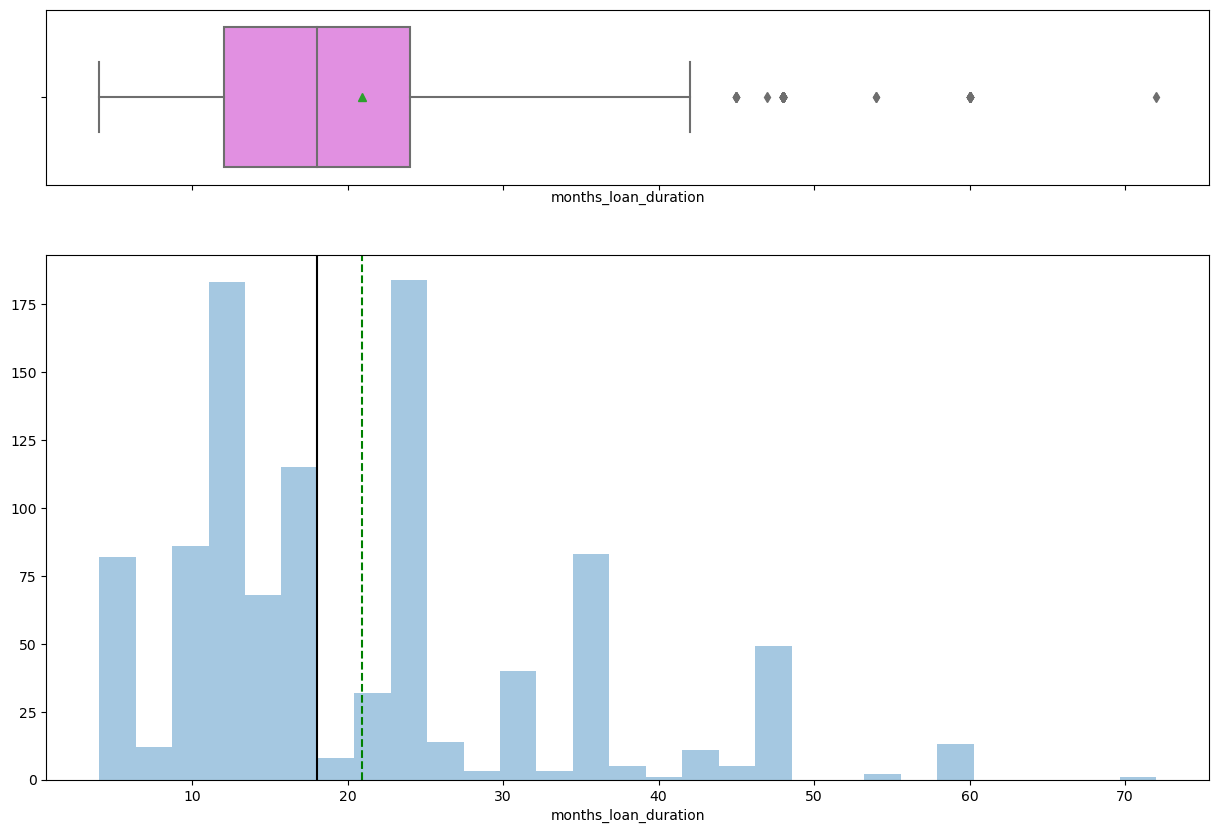

In [21]:
histogram_boxplot(data['months_loan_duration'])

Observation: Most loan durations are 12 and 24 months. There are some outliers in this variable.

**Amount**

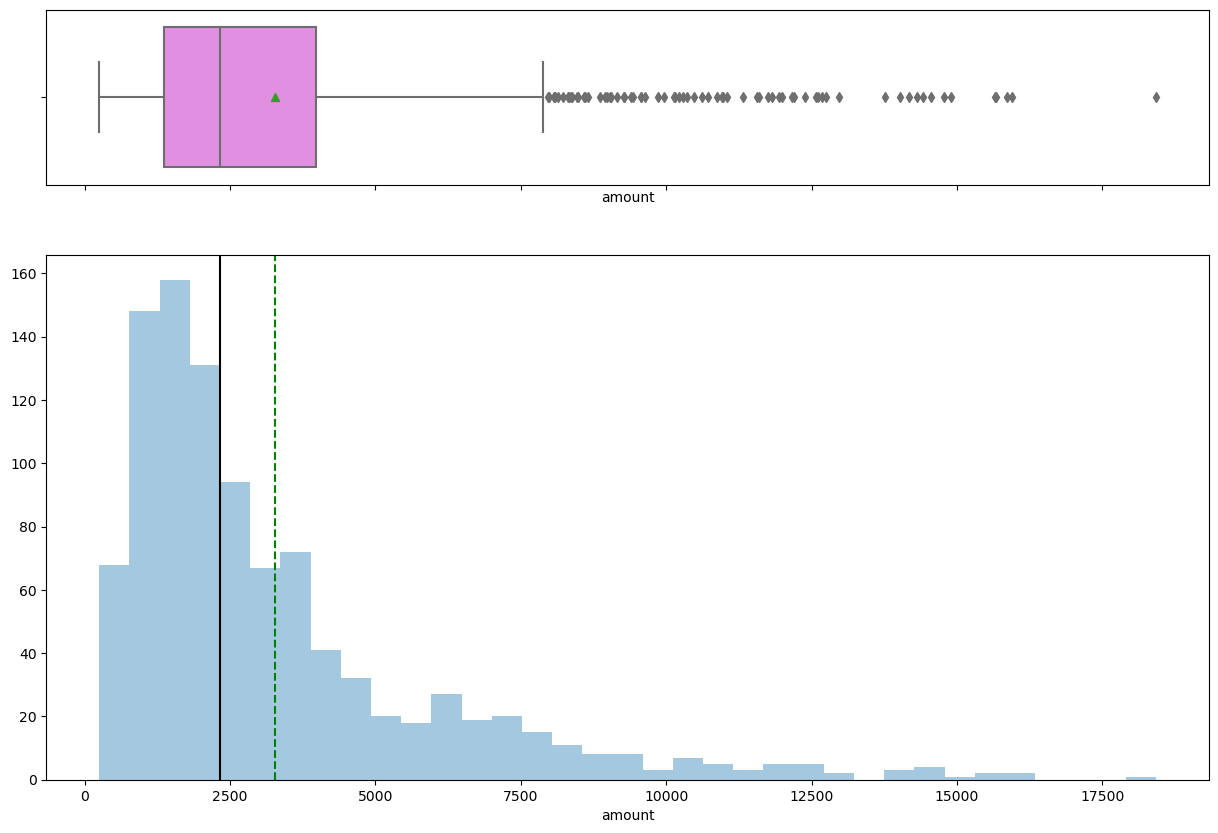

In [22]:
histogram_boxplot(data['amount'])

Observations:
We can see that the amount variable is right skewed, we can see that most amounts are less that $2500. This variable has several outliers. 

**Percent of Income**

Percent of income is a numerical variable however i believe the perc on bar is a better visualization as in this dataset Percent of income should be categorical. 

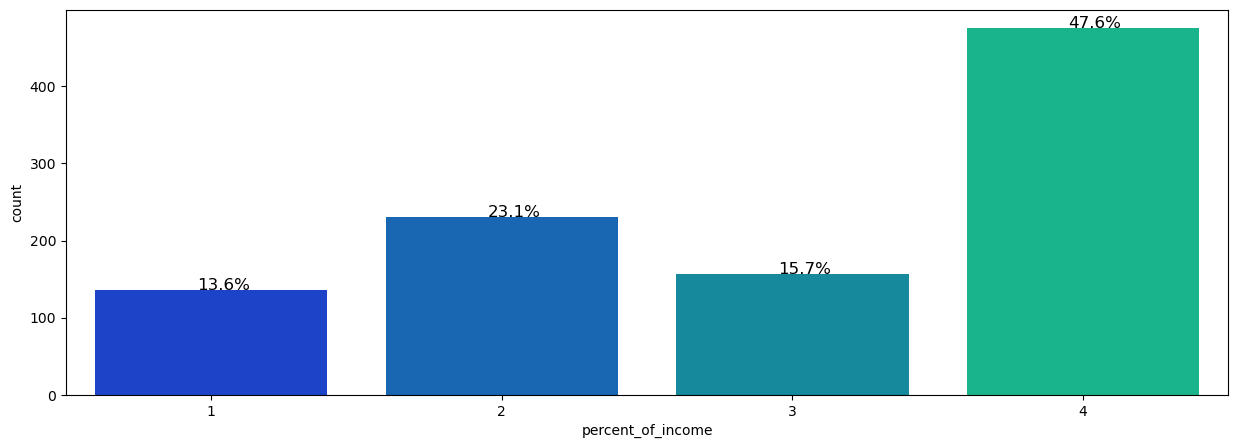

In [23]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["percent_of_income"], palette="winter")
perc_on_bar(ax, data["percent_of_income"])

Observations: 
*  Most people have < 4% of disposable income. (Installment rate in percentage of disposable income)
* On average we see that most people have around 2.9% of disposable income. Median is 3.

**Years at Residence**


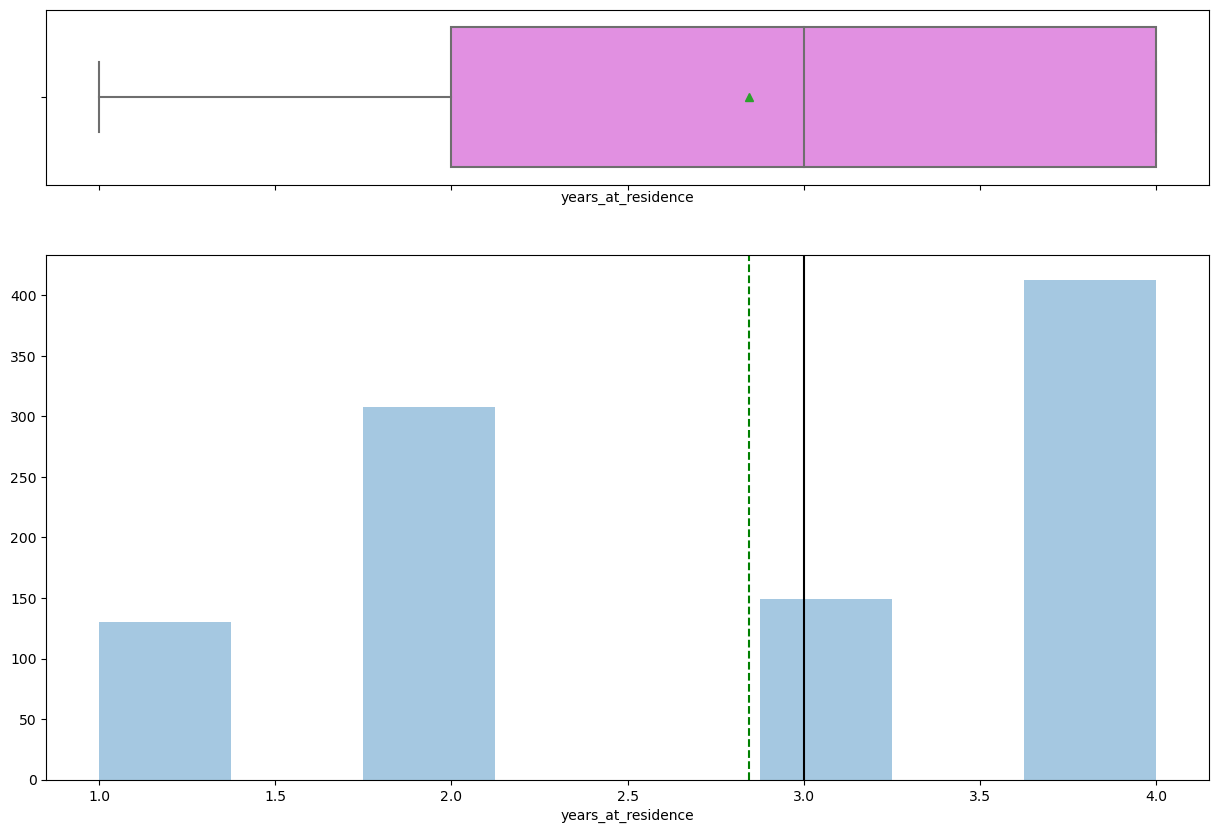

In [24]:
histogram_boxplot(data['years_at_residence'])

Observations: 
* Most people have been living around 3.6-4 years in their current residence. 
* There are not outliers in this variable.


**Age**

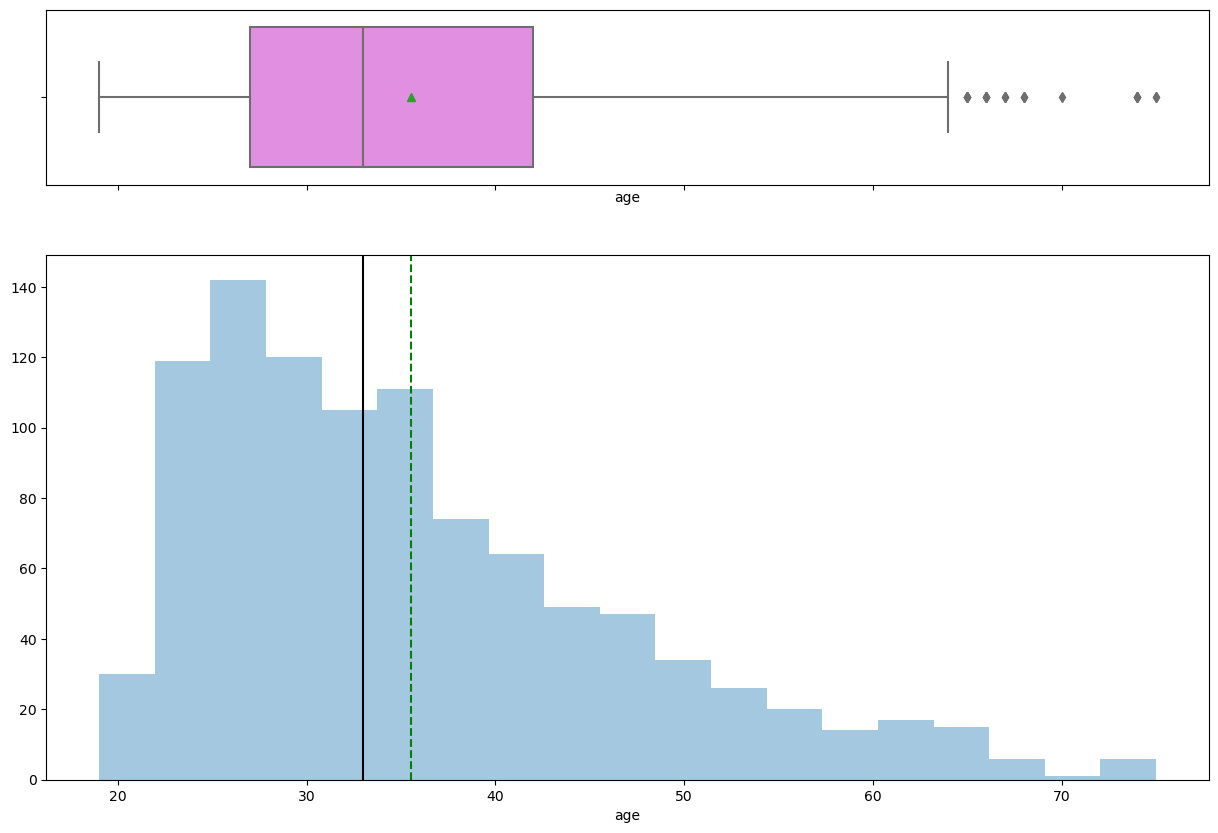

In [25]:
histogram_boxplot(data['age'])

Observations: 
* Age distribution is right skewed with a mean of around 36-37 years old. 
* Most people are in between 26-27 years old. 
* There are a few outliers in this variable. 

**Existing loans count**

Existing loans count is a numerical variable however i believe the perc on bar is a better visualization as in this dataset existing loans should be categorical. 

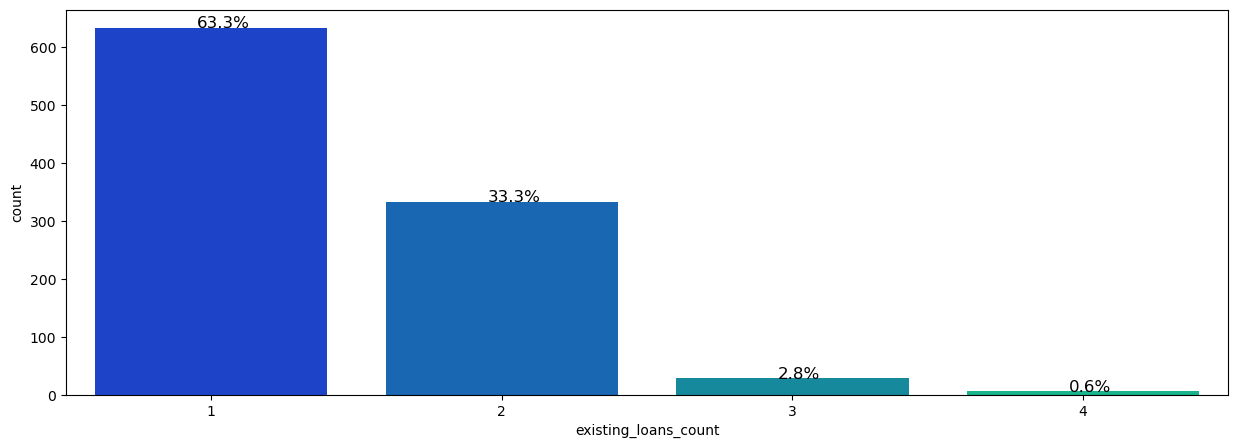

In [26]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["existing_loans_count"], palette="winter")
perc_on_bar(ax, data["existing_loans_count"])

Observations: 
* Most people have 1 existing loan account making it right skewed. 


**Dependent**
Dependents is a numerical variable however i believe the perc on bar is a better visualization as in this dataset dependents should be categorical.

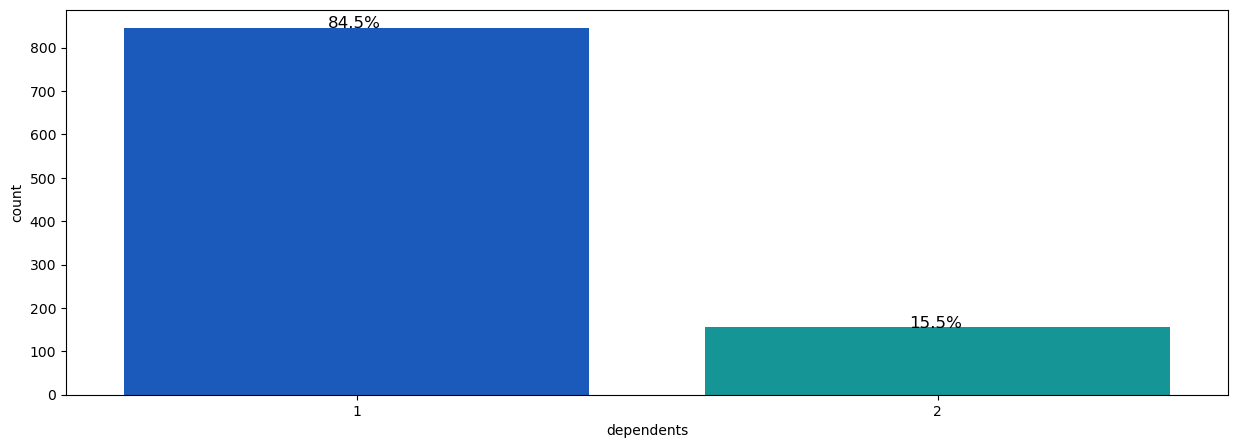

In [27]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["dependents"], palette="winter")
perc_on_bar(ax, data["dependents"])

Observation:
Most people only have one dependent. 

# **Categorical Features**

In [28]:
# Bar plot is more effective in visualizing categorical data 
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

**Credit History**

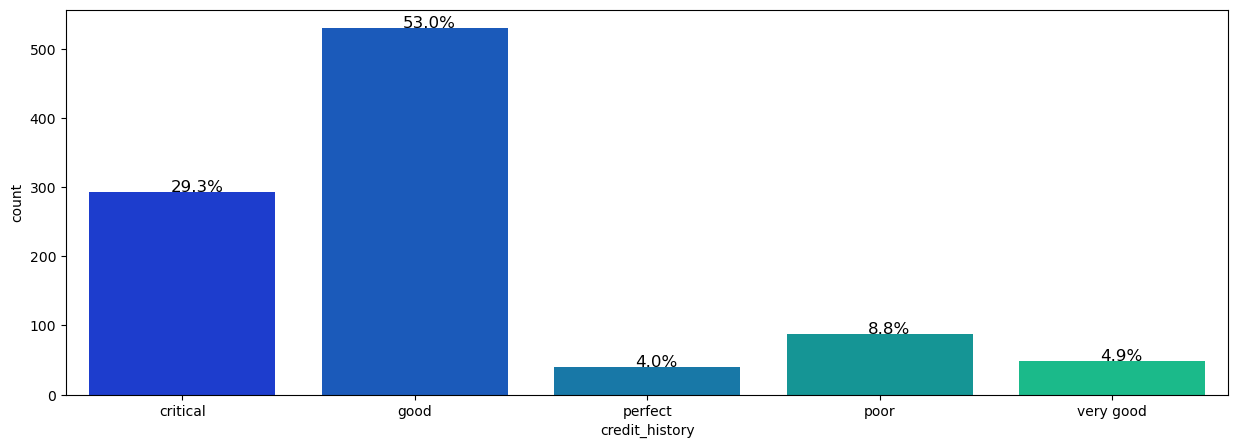

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["credit_history"],palette='winter')
perc_on_bar(ax,data["credit_history"])

Observation: 
* 53% of the customers have good credit history.

**Purpose**

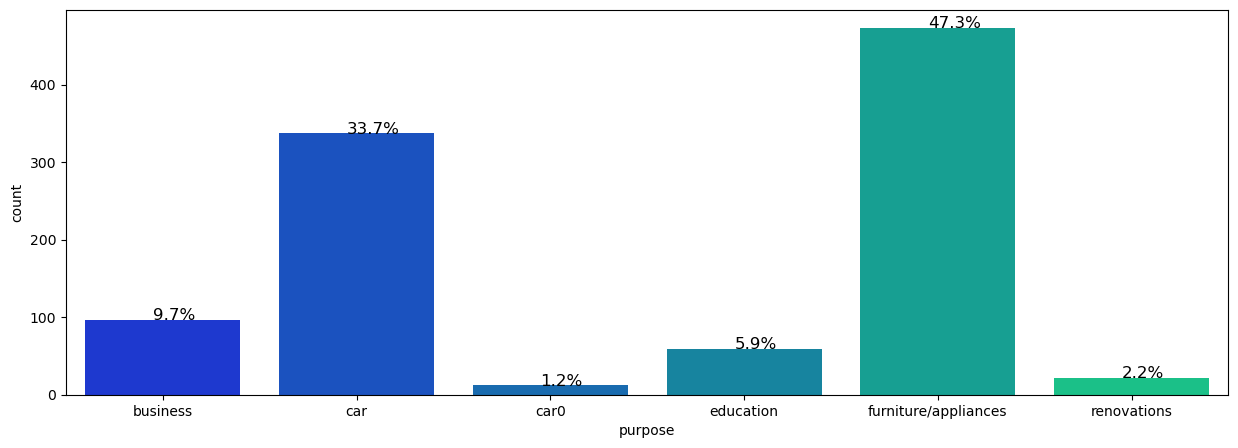

In [30]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["purpose"],palette='winter')
perc_on_bar(ax,data["purpose"])

Observation: 
Most customers purpose for getting a loan is to purchase furniture and / or appliances following by car purchases.

**Savings balance**

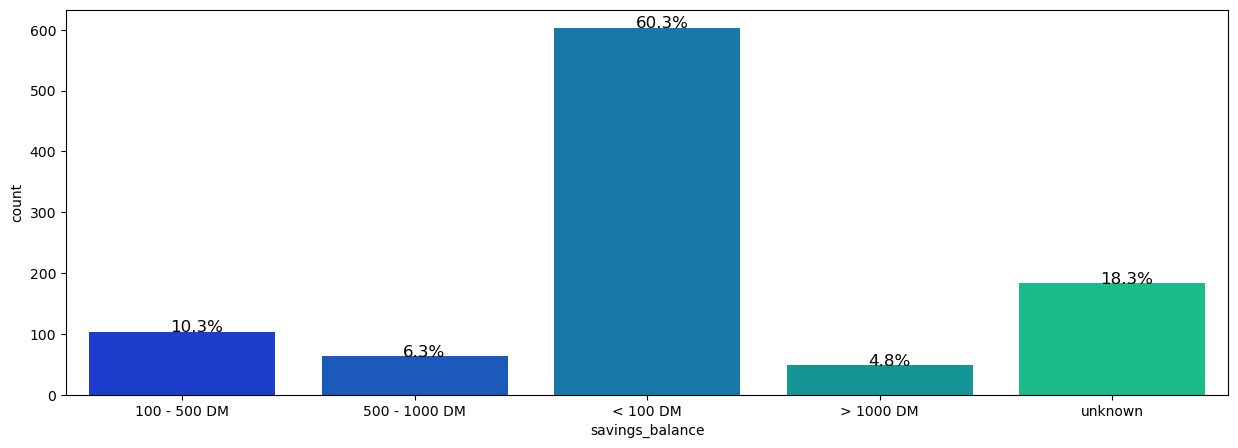

In [31]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["savings_balance"],palette='winter')
perc_on_bar(ax,data["savings_balance"])

Observations: 60.3% of the customers had <100 DM savings account balance.

**Employment Duration**

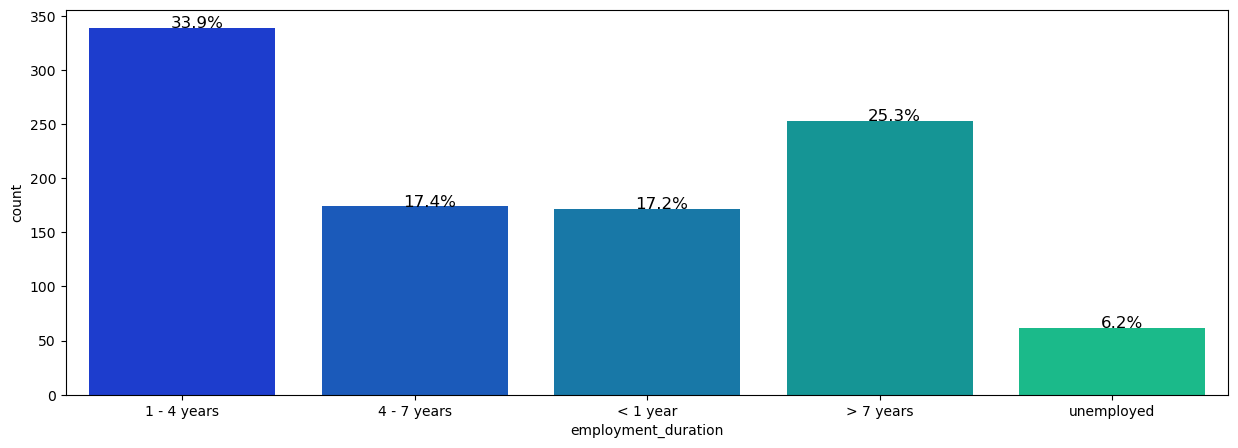

In [32]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["employment_duration"],palette='winter')
perc_on_bar(ax,data["employment_duration"])

Observation: Most customers have been at their current jobs for 1-4 years.

**Other Credit**

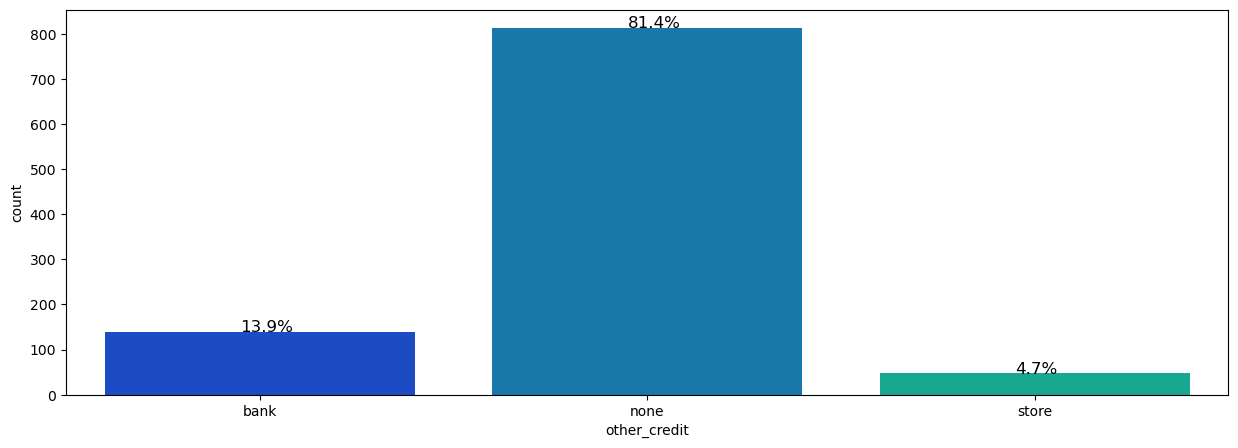

In [33]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["other_credit"],palette='winter')
perc_on_bar(ax,data["other_credit"])

Observation: 81.4% of the customers have other credit.

**Housing**

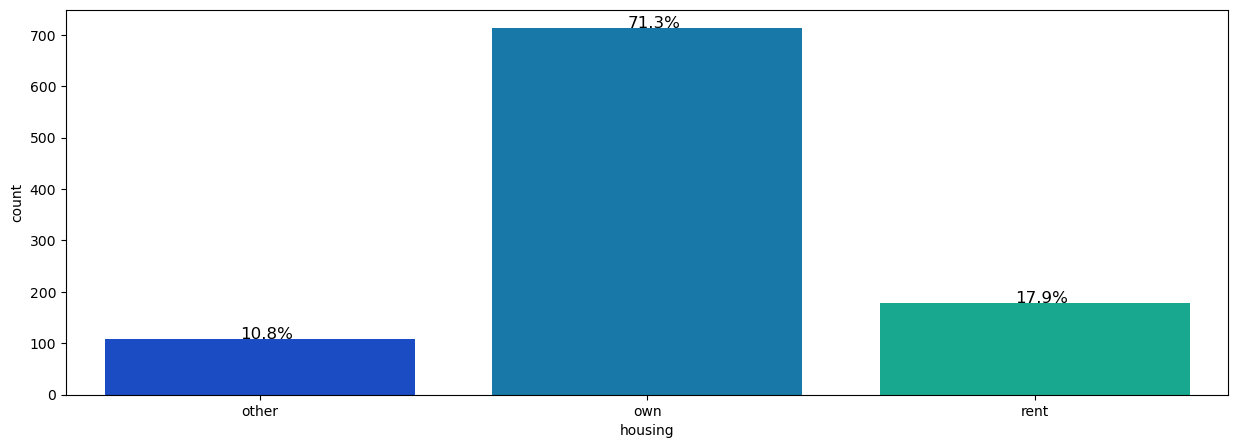

In [34]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["housing"],palette='winter')
perc_on_bar(ax,data["housing"])

Observation: 71.3% customers own a house.

**Job**

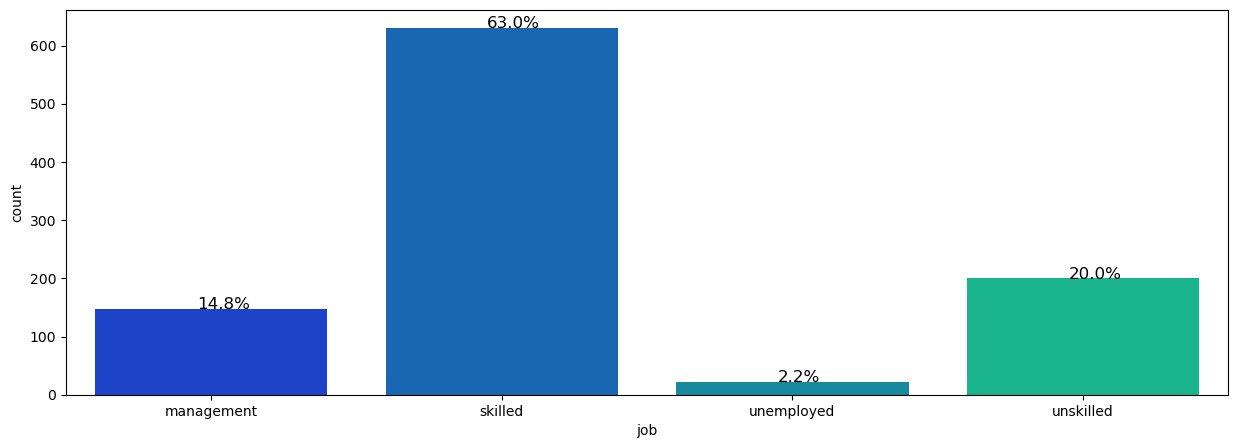

In [35]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["job"],palette='winter')
perc_on_bar(ax,data["job"])

Observation: 63.3% of customers are skilled. 

**Default (Target Variable)**

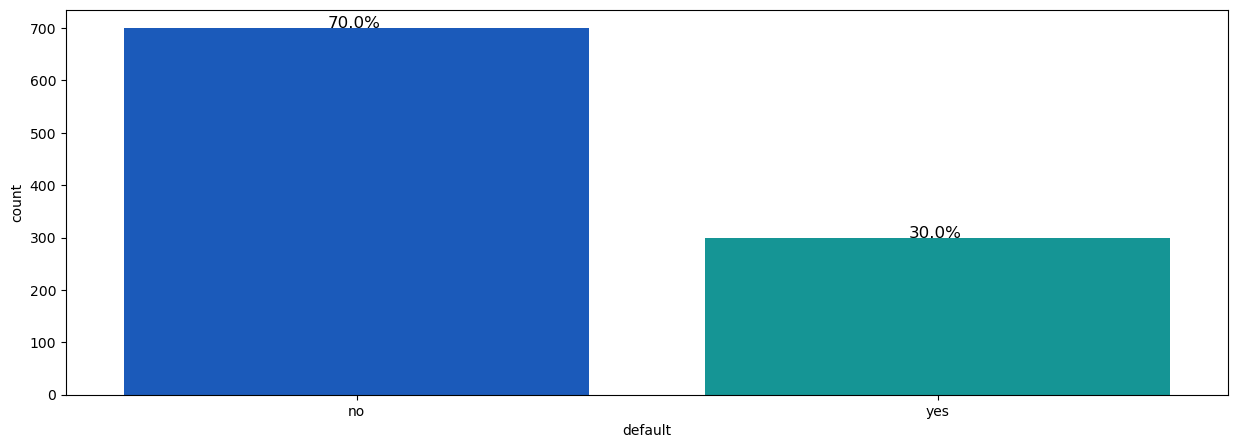

In [36]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["default"],palette='winter')
perc_on_bar(ax,data["default"])

Observation: 70% of customers have not defaulted on previous loans.

# **Bivariate Analysis**

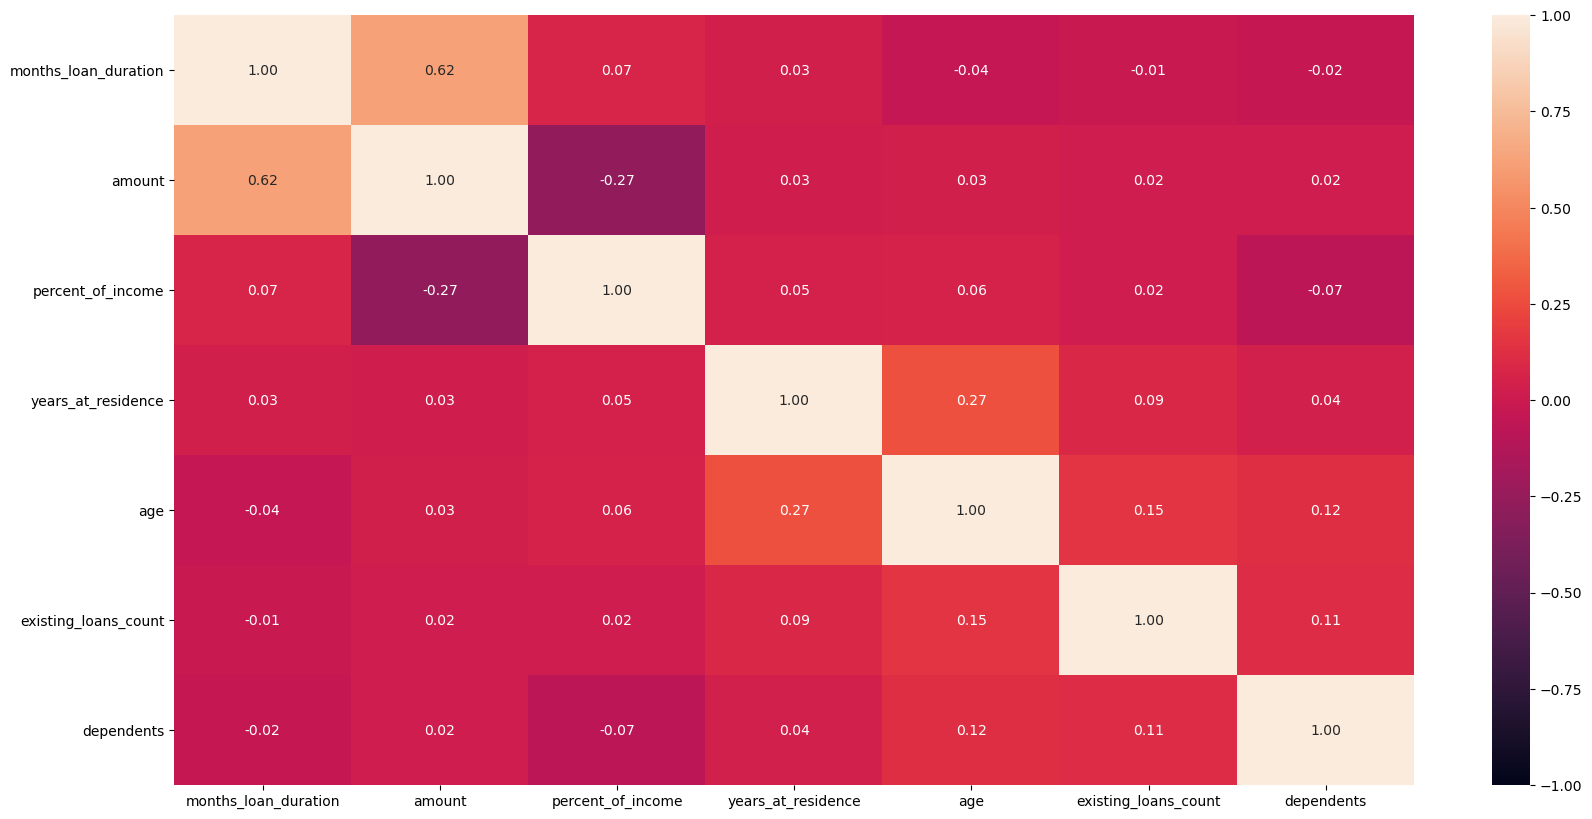

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

Observations: 
* We can see that amount and month_loan duration have the highest correlation at 0.62 followed by years at residence and age at 0.27. 
* Percent of income and amount are the highest negatively correlated at -0.27 followed by percent of income and dependents at -0.07.

# **Comparing the target variable with other variables**

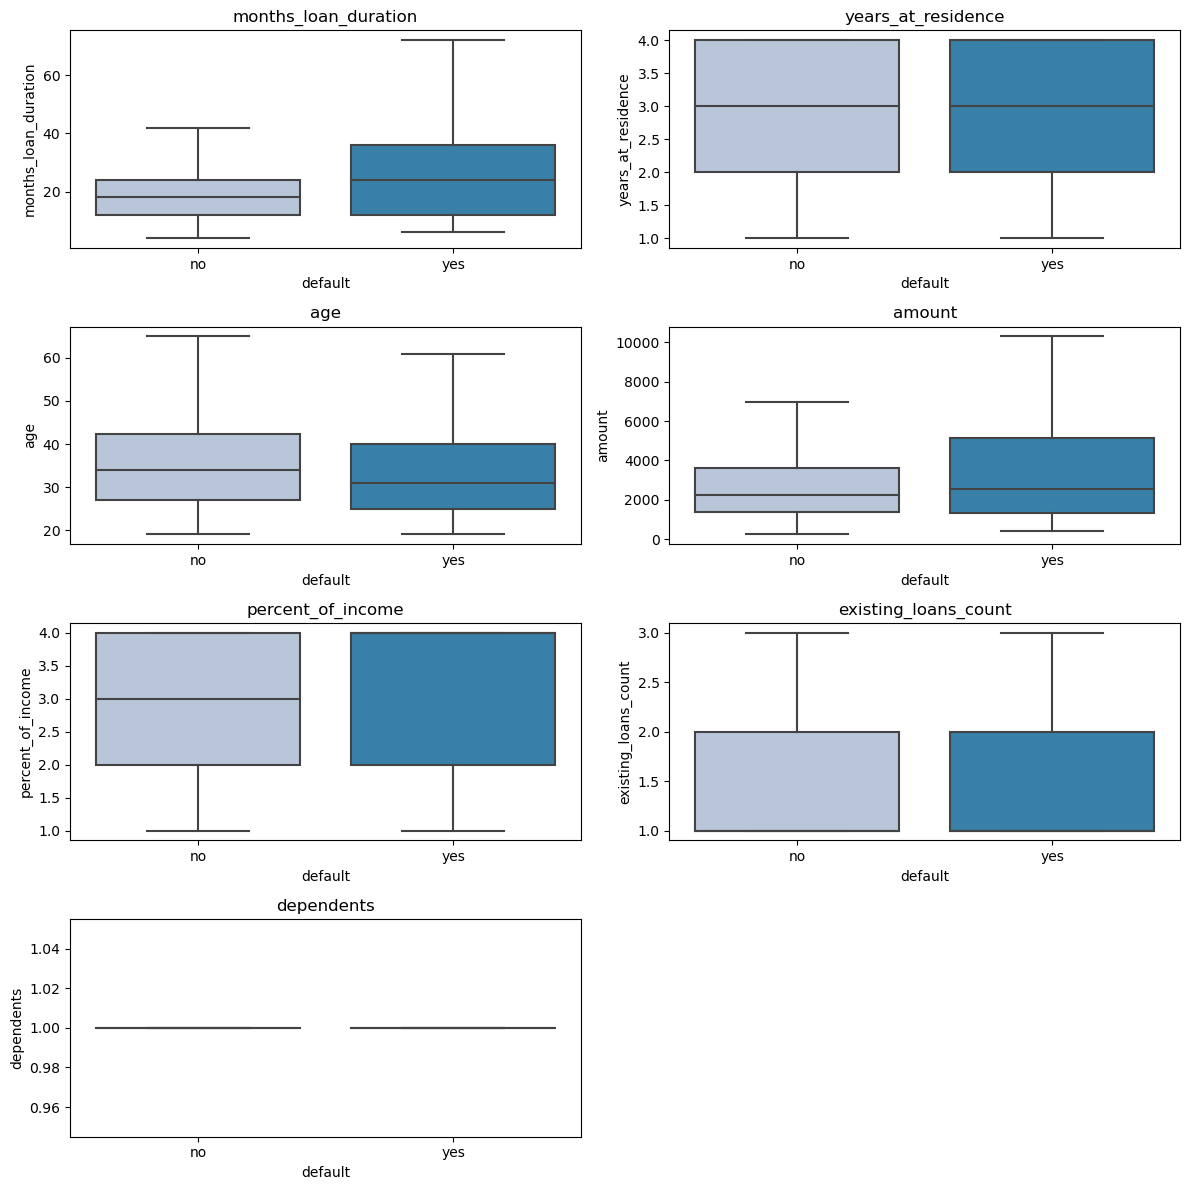

In [38]:
cols = data[
    [
        "months_loan_duration",
        "years_at_residence",
        "age",
        "amount",
        "percent_of_income",
        "existing_loans_count",
        "dependents"
    ]
].columns.tolist()
plt.figure(figsize=(12, 12))

for i, variable in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data["default"], data[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

Observations: 
* Customers with longer loans defaulted than those with shorter ones. 
* Years at residence dont seem to impact default. 
* Customers who are older seem to default less than those who are younger. 
* Customers with higher amounts of loan tend to default more than those with less amounts 
* Percent of income, existing loans counts and dependents dont impact default.

In [39]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['default'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['default'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

**Default vs Credit history**

default          no  yes   All
credit_history                
critical        243   50   293
good            361  169   530
perfect          15   25    40
poor             60   28    88
very good        21   28    49
All             700  300  1000
------------------------------------------------------------------------------------------------------------------------


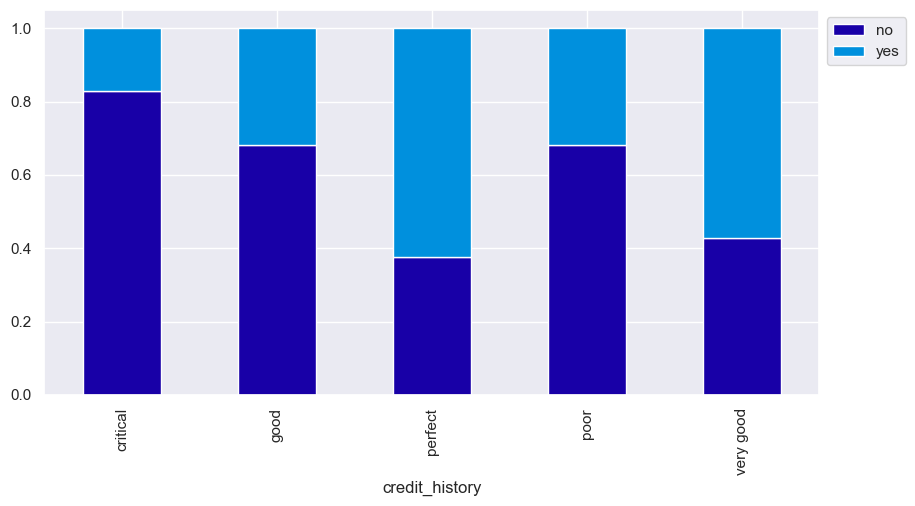

In [40]:
stacked_plot(data['credit_history'])

Observation: 

Customers with perfect and very good credit scores default more than does with poor, critical and good scores.

**Default vs. Purpose**

default                no  yes   All
purpose                             
business               63   34    97
car                   231  106   337
car0                    7    5    12
education              36   23    59
furniture/appliances  349  124   473
renovations            14    8    22
All                   700  300  1000
------------------------------------------------------------------------------------------------------------------------


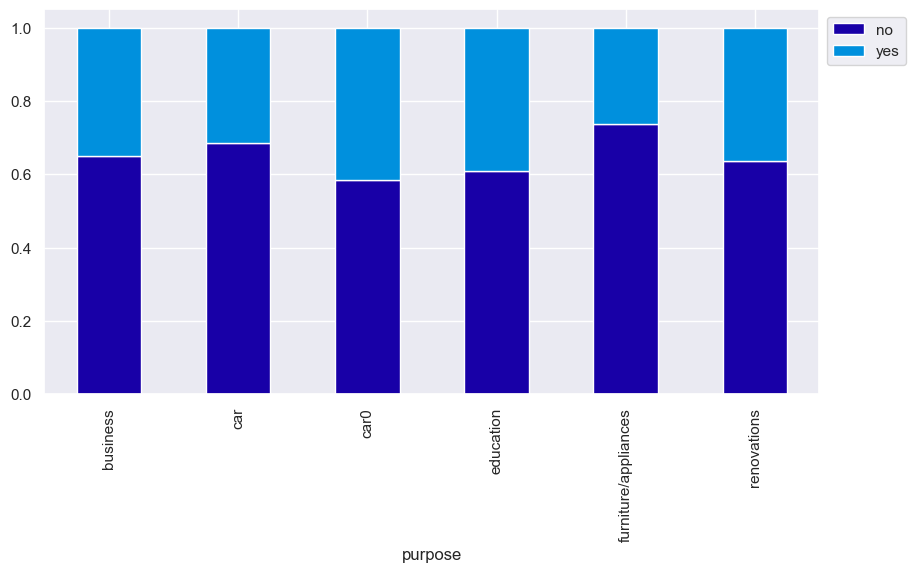

In [41]:
stacked_plot(data['purpose'])

Observations: Those customers with purposes of car 0, education, renovations and car default more. 

**Default vs Savings Balance**

default           no  yes   All
savings_balance                
100 - 500 DM      69   34   103
500 - 1000 DM     52   11    63
< 100 DM         386  217   603
> 1000 DM         42    6    48
unknown          151   32   183
All              700  300  1000
------------------------------------------------------------------------------------------------------------------------


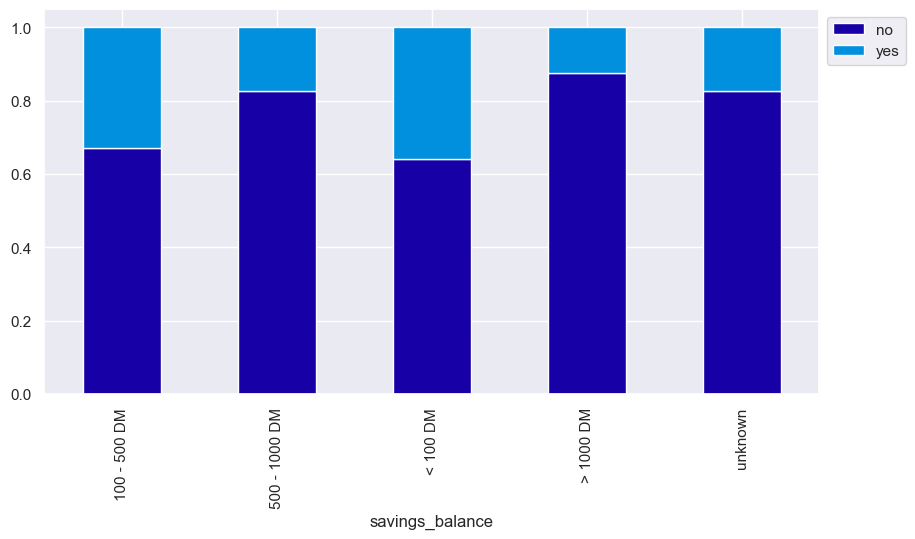

In [42]:
stacked_plot(data['savings_balance'])

Observation: Customers with 100-500DM and <100DM in their savings accounts default more. 

**Default vs Employment duration**

default               no  yes   All
employment_duration                
1 - 4 years          235  104   339
4 - 7 years          135   39   174
< 1 year             102   70   172
> 7 years            189   64   253
unemployed            39   23    62
All                  700  300  1000
------------------------------------------------------------------------------------------------------------------------


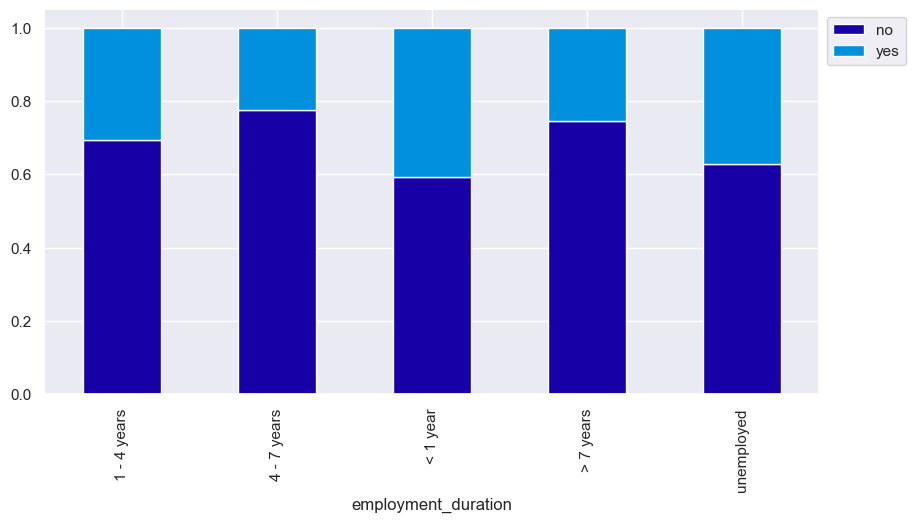

In [43]:
stacked_plot(data['employment_duration'])

Observation: Customers that are unemployed and that have less a year of employment default more than others. 

**Default vs Other credit**

default        no  yes   All
other_credit                
bank           82   57   139
none          590  224   814
store          28   19    47
All           700  300  1000
------------------------------------------------------------------------------------------------------------------------


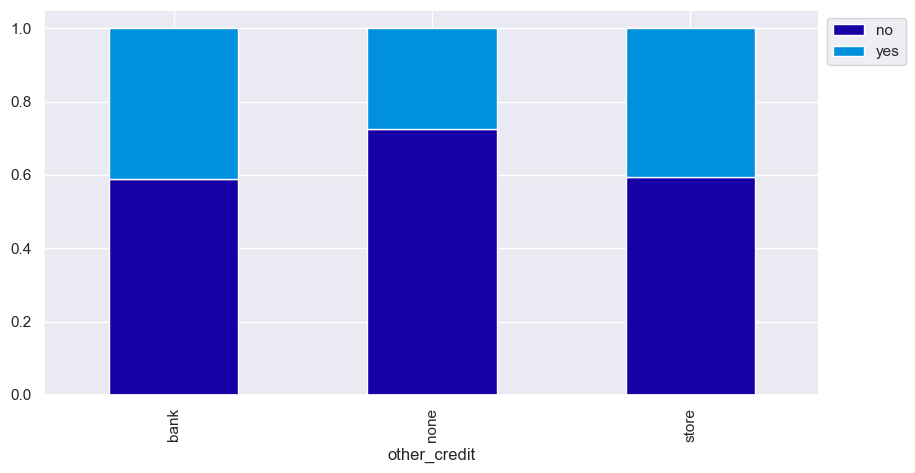

In [44]:
stacked_plot(data['other_credit'])

Observation: Customers with bank and store credit default more than none.

**Default vs Housing**

default   no  yes   All
housing                
other     64   44   108
own      527  186   713
rent     109   70   179
All      700  300  1000
------------------------------------------------------------------------------------------------------------------------


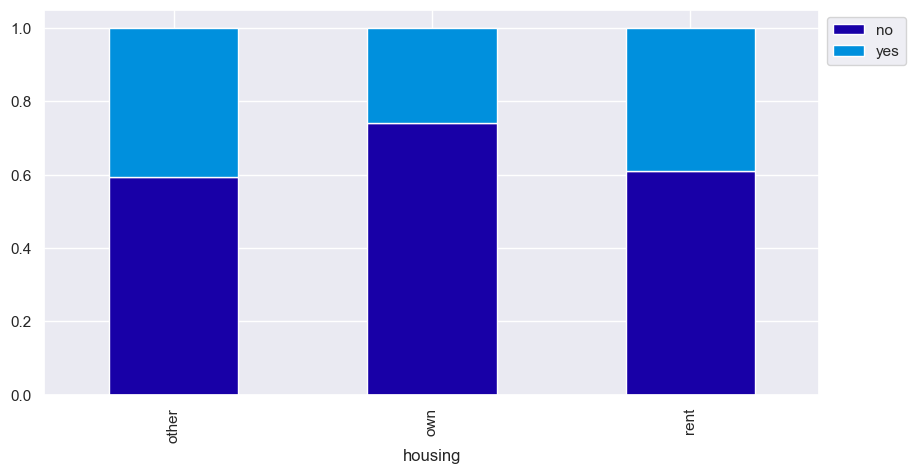

In [45]:
stacked_plot(data['housing'])

Observation: Customers with other and renting default more than those who own properties.

Default vs Job

default      no  yes   All
job                       
management   97   51   148
skilled     444  186   630
unemployed   15    7    22
unskilled   144   56   200
All         700  300  1000
------------------------------------------------------------------------------------------------------------------------


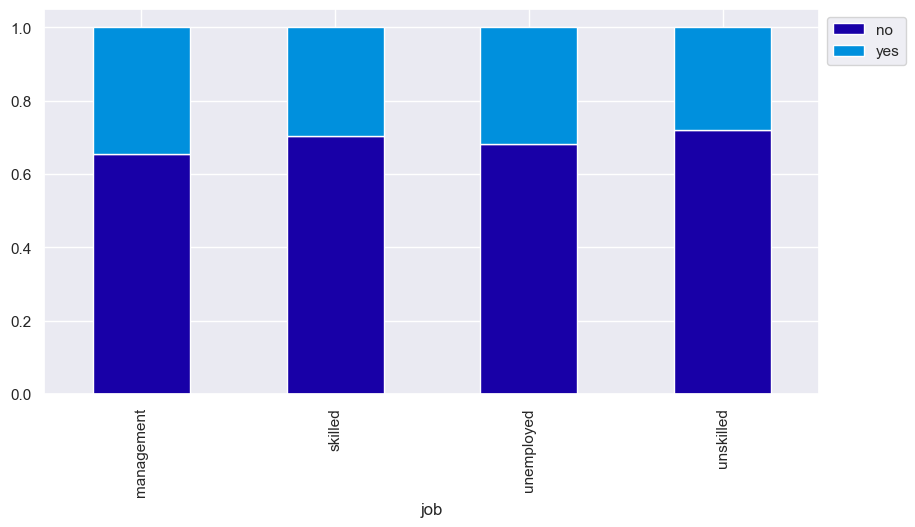

In [46]:
stacked_plot(data['job'])

Observation: Skilled customers default less than all the other categories.

# **Model Building**

# **Data Splitting**

In [47]:
# the lambda function: it's a quick one-liner function, 


X = data.drop(['default'],axis=1)
X = pd.get_dummies(X,drop_first=True) # drop the first column 
y = data['default'].apply(lambda x : 1 if x=='yes' else 0)

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   months_loan_duration             1000 non-null   int64
 1   amount                           1000 non-null   int64
 2   percent_of_income                1000 non-null   int64
 3   years_at_residence               1000 non-null   int64
 4   age                              1000 non-null   int64
 5   existing_loans_count             1000 non-null   int64
 6   dependents                       1000 non-null   int64
 7   credit_history_good              1000 non-null   uint8
 8   credit_history_perfect           1000 non-null   uint8
 9   credit_history_poor              1000 non-null   uint8
 10  credit_history_very good         1000 non-null   uint8
 11  purpose_car                      1000 non-null   uint8
 12  purpose_car0                     1000 non-null   

In [52]:
X=clean_columns(X)

9 column names have been cleaned

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   months_loan_duration            1000 non-null   int64
 1   amount                          1000 non-null   int64
 2   percent_of_income               1000 non-null   int64
 3   years_at_residence              1000 non-null   int64
 4   age                             1000 non-null   int64
 5   existing_loans_count            1000 non-null   int64
 6   dependents                      1000 non-null   int64
 7   credit_history_good             1000 non-null   uint8
 8   credit_history_perfect          1000 non-null   uint8
 9   credit_history_poor             1000 non-null   uint8
 10  credit_history_very_good        1000 non-null   uint8
 11  purpose_car                     1000 non-null   uint8
 12  purpose_car_0                   1000 non-null   uint8
 13  purp

In [54]:
#Removing characters from column names
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '_>'))) else col for col in X.columns.values]

In [55]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(700, 31) (300, 31)


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   months_loan_duration             1000 non-null   int64
 1   amount                           1000 non-null   int64
 2   percent_of_income                1000 non-null   int64
 3   years_at_residence               1000 non-null   int64
 4   age                              1000 non-null   int64
 5   existing_loans_count             1000 non-null   int64
 6   dependents                       1000 non-null   int64
 7   credit_history_good              1000 non-null   uint8
 8   credit_history_perfect           1000 non-null   uint8
 9   credit_history_poor              1000 non-null   uint8
 10  credit_history_very good         1000 non-null   uint8
 11  purpose_car                      1000 non-null   uint8
 12  purpose_car0                     1000 non-null   

In [57]:
data=clean_columns(data)

0 column names have been cleaned

In [58]:
y.value_counts(1)

0    0.7
1    0.3
Name: default, dtype: float64

In [59]:
y_test.value_counts(1)

0    0.7
1    0.3
Name: default, dtype: float64

In [60]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [61]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **Decision Tree Classifier**

Accuracy on training set :  1.0
Accuracy on test set :  0.6266666666666667
Recall on training set :  1.0
Recall on test set :  0.4222222222222222
Precision on training set :  1.0
Precision on test set :  0.3877551020408163
F1-Score on training set :  1.0
F1-Score on test set :  0.40425531914893614


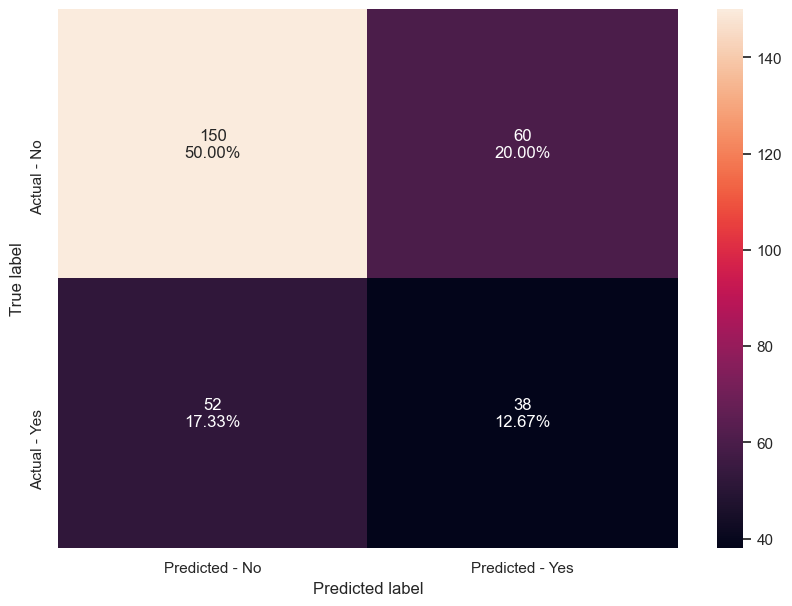

In [62]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

Observation: The model is overfitting the training set. 

# **Decision Tree Classifier - Hyperparameter Tuning**

In [63]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.30,1:0.70},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=7,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

Accuracy on training set :  0.7428571428571429
Accuracy on test set :  0.6666666666666666
Recall on training set :  0.5571428571428572
Recall on test set :  0.4
Precision on training set :  0.5735294117647058
Precision on test set :  0.43902439024390244
F1-Score on training set :  0.5652173913043478
F1-Score on test set :  0.4186046511627907


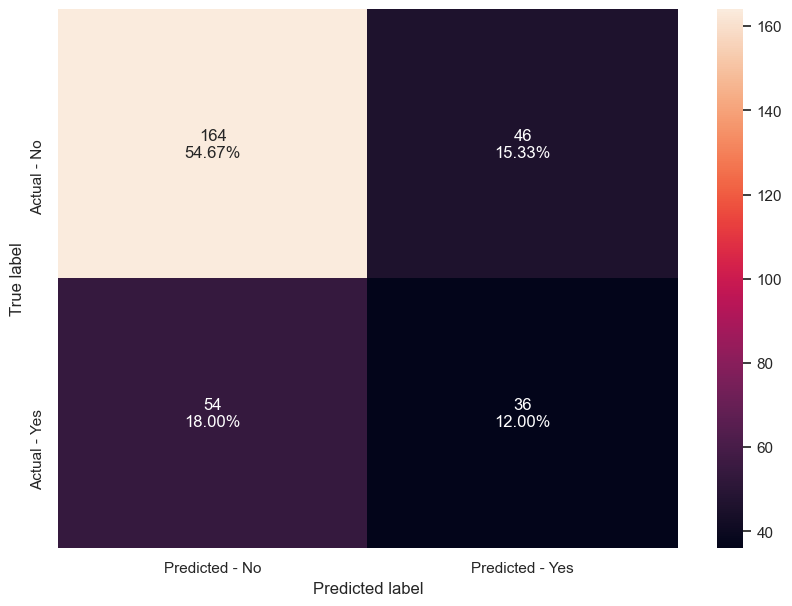

In [64]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

Observation: Hyperparameter tunning has helped in reducing overfitting and improved the F1 score, accuracy and precision a bit on the test set.

# **Random Forest Classifier**

Accuracy on training set :  1.0
Accuracy on test set :  0.74
Recall on training set :  1.0
Recall on test set :  0.2777777777777778
Precision on training set :  1.0
Precision on test set :  0.6578947368421053
F1-Score on training set :  1.0
F1-Score on test set :  0.39062500000000006


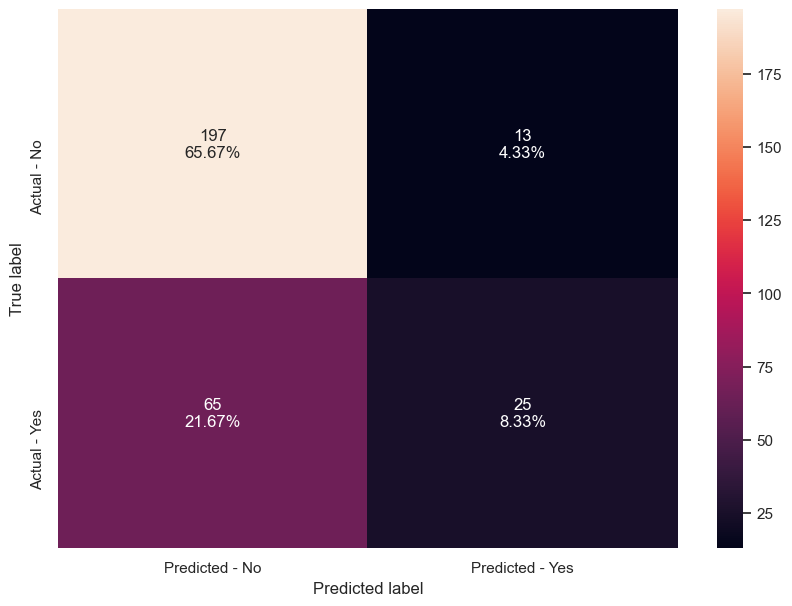

In [65]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

Observation: Randome forest model shows overfitting. Recall and F1 scores have decresed on test set.

## **Random Forest Classifier - Hyperparameter Tuning**

In [66]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.30,1:0.70},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=15,
                       max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=17, n_estimators=80, oob_score=True,
                       random_state=1)

Accuracy on training set :  0.8514285714285714
Accuracy on test set :  0.67
Recall on training set :  0.8142857142857143
Recall on test set :  0.5333333333333333
Precision on training set :  0.7245762711864406
Precision on test set :  0.45714285714285713
F1-Score on training set :  0.7668161434977578
F1-Score on test set :  0.4923076923076923


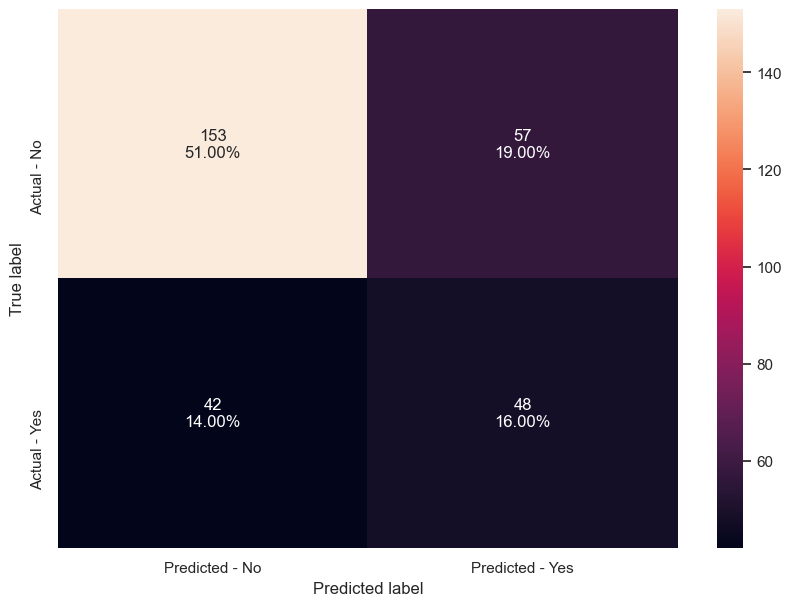

In [67]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

Observation- The overfitting has been reduced; the f1 score and recall scores have improved.

# **Bagging Classifier**

Accuracy on training set :  0.9771428571428571
Accuracy on test set :  0.6866666666666666
Recall on training set :  0.9238095238095239
Recall on test set :  0.24444444444444444
Precision on training set :  1.0
Precision on test set :  0.4583333333333333
F1-Score on training set :  0.9603960396039605
F1-Score on test set :  0.31884057971014496


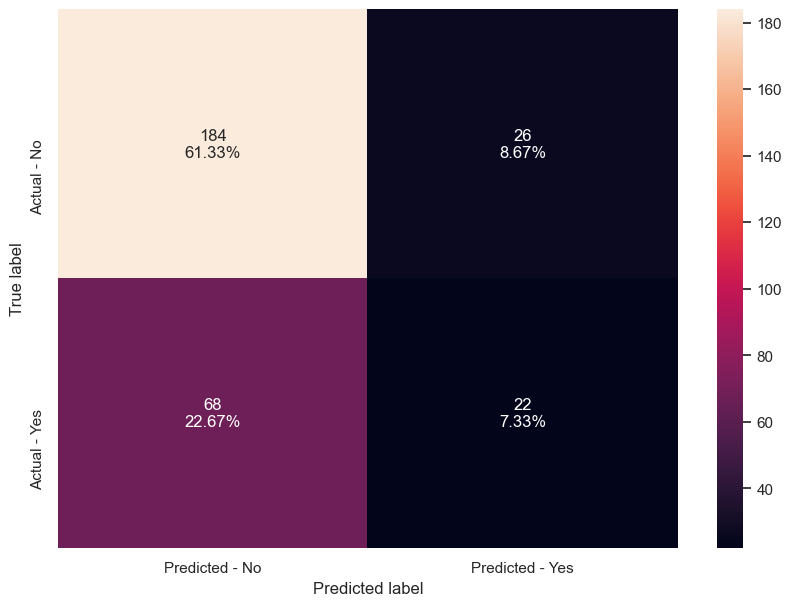

In [68]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

Observation: Precision is overfitting, recall and F1 Scores are low.

# **Bagging Classifier - Hyperparameter Tuning**

In [69]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=40,
                  random_state=1)

Accuracy on training set :  0.9942857142857143
Accuracy on test set :  0.73
Recall on training set :  0.9809523809523809
Recall on test set :  0.34444444444444444
Precision on training set :  1.0
Precision on test set :  0.5849056603773585
F1-Score on training set :  0.9903846153846153
F1-Score on test set :  0.43356643356643354


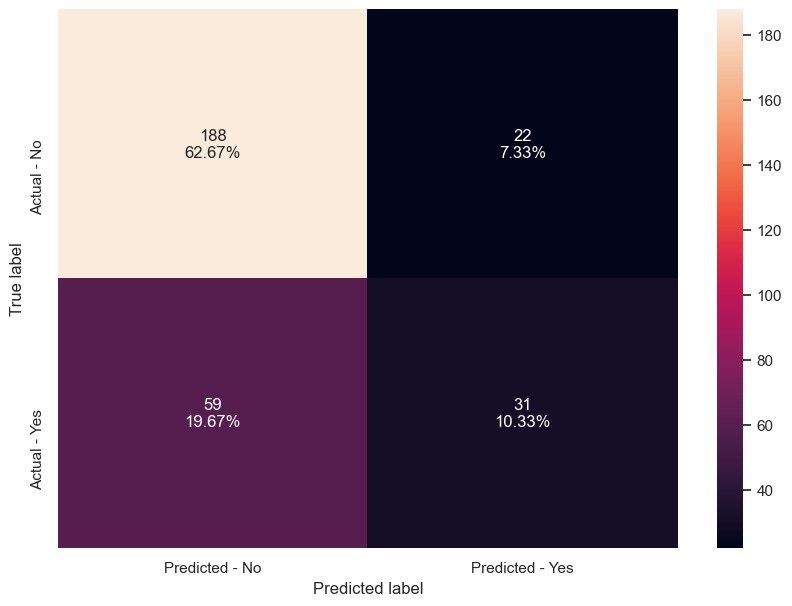

In [70]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

Observation: Precision is still overfitting the data, F1 Score, and recall improved a bit.

# **AdaBoost Classifier**

Accuracy on training set :  0.7814285714285715
Accuracy on test set :  0.7
Recall on training set :  0.49523809523809526
Recall on test set :  0.36666666666666664
Precision on training set :  0.6887417218543046
Precision on test set :  0.5
F1-Score on training set :  0.5761772853185595
F1-Score on test set :  0.423076923076923


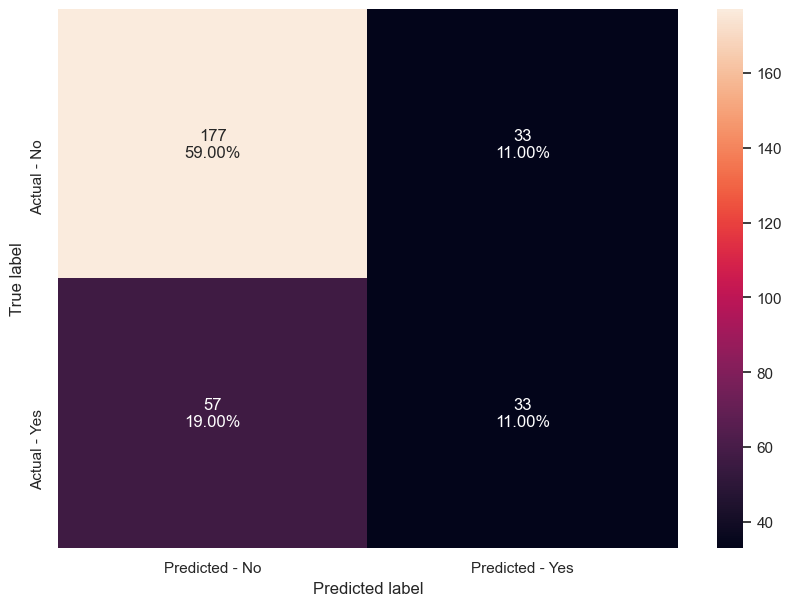

In [71]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

Observation: overfitting has improved, but scores are low. This model doesnt work.

# **AdaBoost Classifier - Hyperparameter Tuning**

In [72]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.8000000000000003, n_estimators=40,
                   random_state=1)

Accuracy on training set :  0.8657142857142858
Accuracy on test set :  0.6433333333333333
Recall on training set :  0.7380952380952381
Recall on test set :  0.45555555555555555
Precision on training set :  0.7989690721649485
Precision on test set :  0.41414141414141414
F1-Score on training set :  0.7673267326732673
F1-Score on test set :  0.4338624338624339


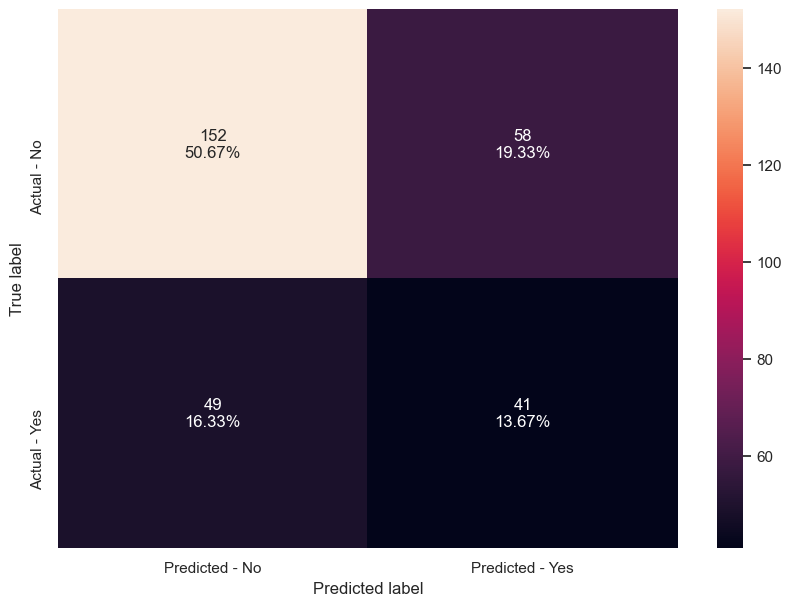

In [73]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

Observation: After hyperparameter tuning, we can see a slight increase in recall, precision and F1 score but all our scores are still quite low.

# **Gradient Boosting Classifier**

Accuracy on training set :  0.8857142857142857
Accuracy on test set :  0.6866666666666666
Recall on training set :  0.6571428571428571
Recall on test set :  0.28888888888888886
Precision on training set :  0.9452054794520548
Precision on test set :  0.4642857142857143
F1-Score on training set :  0.7752808988764044
F1-Score on test set :  0.3561643835616438


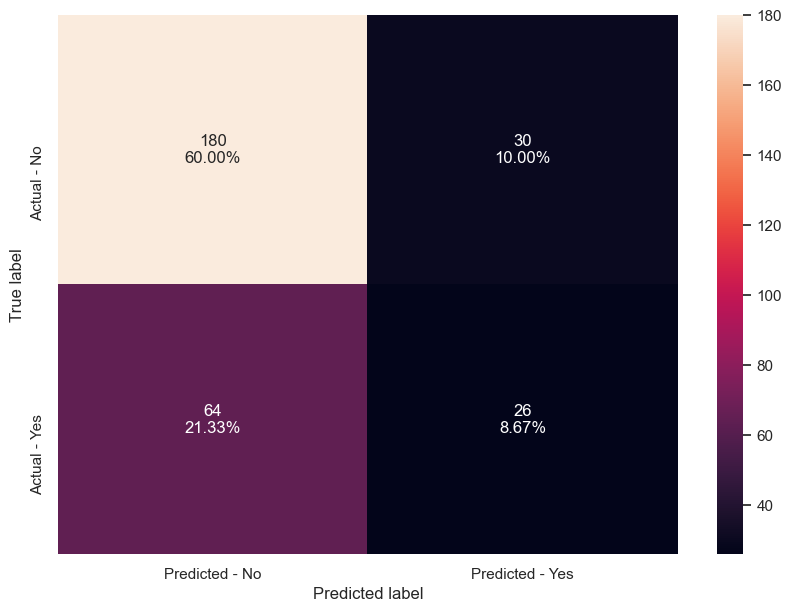

In [74]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

Observation: Recall and F1 scores decreased. 

# **Gradient Boosting Classifier - Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

Observation - Recall score is very low , F1 score improved. 

# **XGBoost Classifier**

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss', nthread=-1)
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

# **XGBoost Classifier - Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

# **Stacking Classifier**

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

In [ ]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)